In [166]:
import pandas as pd
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import csv
import pprint
import seaborn as sns

skill_data = pd.read_csv('skill_ms_dos.csv')
users_data = pd.read_csv('users.tsv',sep='\t')


Populating the interactive namespace from numpy and matplotlib


In [315]:
print skill_data.info()
print users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 5 columns):
ID               61 non-null object
NAME             61 non-null object
SKILLS           61 non-null object
FIELD            61 non-null object
FEATURES_USED    61 non-null object
dtypes: object(5)
memory usage: 3.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 12 columns):
UserID                  4014 non-null int64
City                    4014 non-null object
State                   4002 non-null object
Country                 4014 non-null object
ZipCode                 3972 non-null object
DegreeType              4014 non-null object
Major                   3036 non-null object
GraduationDate          2781 non-null object
WorkHistoryCount        4014 non-null int64
TotalYearsExperience    3837 non-null float64
CurrentlyEmployed       4014 non-null float64
ManagedOthers           4014 non-null int64
dtypes: float64(2), int64(3

In [155]:
#cleaning the data
#fixing the multivalued fields by converting them to a python list

def fix_field(field):
    
    list_data = []
    if field.startswith('{'):
        field = field[1:-1]
        list_data = field.split('|')
    elif field == "NULL":
        list_data=[]
    else:
        list_data.append(field)
    return list_data

def process_file(filename):
    data = []
    with open(filename, "r") as f:
        reader = csv.DictReader(f)
        # processing file
        for line in reader:
            # calling the function to fix the area value
            if "SKILLS" in line :
                line["SKILLS"] = fix_field(line["SKILLS"])
            if "FEATURES_USED" in line:
                line["FEATURES_USED"] = fix_field(line["FEATURES_USED"])
            data.append(line)
    return data

In [156]:
#calling the function to clean the data and displaying a sample output after cleaning
data = process_file('skill_ms_dos.csv')
pprint.pprint(data[0])

{'FEATURES_USED': ['CONNECTIONS', 'LEARNING', 'BUSINESS SERVICE'],
 'FIELD': 'ARTIFICIAL INTELLIGENCE',
 'ID': '47',
 'NAME': 'John Smith',
 'SKILLS': ['ML', 'LISP', 'PROLOG']}


In [157]:
features = ['CONNECTIONS','LEARNING','BUSINESS SERVICE','FOLLOW','SHARE','JOBS AND INTERNSHIPS']
features_data = {}
total_users = len(data)
for feature in features:
    count = 0
    for i in range(0, len(data)):
        if feature in data[i]["FEATURES_USED"]:
            count += 1
    features_data[feature] = (float(count)/total_users)*100  #calculate % users of a particular feature
pprint.pprint(features_data)

{'BUSINESS SERVICE': 4.49438202247191,
 'CONNECTIONS': 30.337078651685395,
 'FOLLOW': 34.831460674157306,
 'JOBS AND INTERNSHIPS': 17.97752808988764,
 'LEARNING': 22.47191011235955,
 'SHARE': 16.853932584269664}


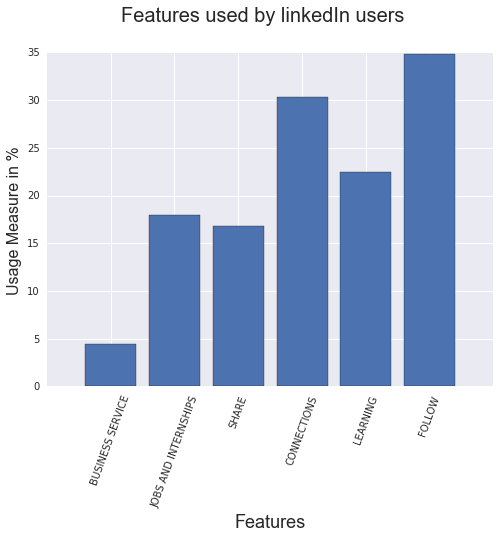

In [312]:
#plot a bar graph for features data

fig = plt.figure(1, figsize=(8, 8))
plt.bar(range(len(features_data)), features_data.values(), align='center')
plt.xticks(range(len(features_data)), features_data.keys(),rotation=70)
fig.suptitle('Features used by linkedIn users', fontsize=20)
plt.xlabel('Features', fontsize=18)
plt.ylabel('Usage Measure in %', fontsize=16)
subplots_adjust(bottom=0.32)
fig.savefig('features_plot.jpg')

In [318]:
## percentages for employees: Who are our employees

users_data = pd.read_csv('users.tsv',sep='\t')
total = users_data.count()

def modify_data(field):
    users_data[field].replace(to_replace=['Yes','No'],value=[1,0],inplace = True)
    users_data[field].fillna(value=0,inplace = True)

modify_data('CurrentlyEmployed')
modify_data('ManagedOthers')

working_professionals = (users_data['CurrentlyEmployed'].sum() / total['UserID']) *100
managers = (float(users_data['ManagedOthers'].sum()) / total['UserID']) *100
others = 100 - working_professionals  #unemployed and students

print working_professionals
print managers
print others

47.0852017937
19.3572496263
52.9147982063


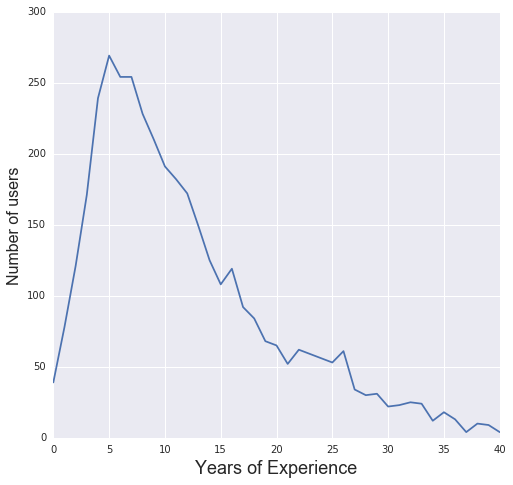

In [316]:
##Experience graph

fig = plt.figure(1, figsize=(8, 8))
a = users_data.groupby('TotalYearsExperience').count()['UserID']
plt.plot(a)
pylab.xlim([0,40])
#fig.suptitle('', fontsize=20)
plt.xlabel('Years of Experience', fontsize=18)
plt.ylabel('Number of users', fontsize=16)
subplots_adjust(bottom=0.16)
fig.savefig('experience_plot.jpg')